In [1]:
import pandas as pd

# Read the .feather file
boardgames_file = './bgg_boardgames_top_2000.feather'
df_games = pd.read_feather(boardgames_file)

# Drop the column you want to remove
df_games.drop(columns=['comments', 'marketplace_history', 'description', 'expansions', 'thumbnail_link', 'image_link', 'publishers', 'honors', 'podcast_episodes','users_rated','average_rating','bayes_average_rating','median','stddev','owned','trading','wishing','num_of_comments','num_of_weights','average_weight','accessories','artists','designers','graphic_designers', 'ranks', 'suggested_numplayers'], inplace=True)

df_games.to_csv('boardgames.csv', index=False)

In [141]:
coopLabel = 'Cooperative Game'
soloLabel = 'Solo / Solitaire Game'

class BoardGameRow:
    def __init__(self, row):
        self.id = row['boardgame_id']
        self.title = row['title']
        self.year = row['year_published']
        self.minPlayers = row['minplayers']
        self.maxPlayers = row['maxplayers']
        self.minPlaytime = row['minplaytime']
        self.maxPlaytime = row['maxplaytime']
        self.publisher = row['main_publisher']
        self.age = row['age']
        
        mechanics = None
        if row['mechanics']: 
            mechanics = sorted([mechanic for mechanic in row['mechanics'].split('|') if row['mechanics']])
            self.mechanics = mechanics
        
        self.coopGame = mechanics and coopLabel in mechanics
        self.soloGame = mechanics and soloLabel in mechanics
        self.shortGame = int(row['maxplaytime']) <= 30

        if row['category']:
            self.categories = [category for category in row['category'].split('|') if row['category']]

        if row['subdomains']:
            self.main_categories = [subdomain for subdomain in row['subdomains'].split('|')]

    

    def __str__(self):
        attributes = ', '.join([f"{key}={value}" for key, value in self.__dict__.items()])
        return f"BoardGameRow({attributes})"
    
    def __repr__(self):
        return str(self)
    
    def get_id(self):
        return self.id

    def get_title(self):
        return self.title

    def get_year(self):
        return self.year

    def get_min_players(self):
        return self.minPlayers

    def get_max_players(self):
        return self.maxPlayers

    def get_min_playtime(self):
        return self.minPlaytime

    def get_max_playtime(self):
        return self.maxPlaytime

    def get_publisher(self):
        return self.publisher

    def get_age(self):
        return self.age

    def get_mechanics(self):
        return getattr(self, 'mechanics', None)

    def is_coop_game(self):
        return self.coopGame
    
    def is_solo_game(self):
        return self.soloGame
    
    def is_short_game(self):
        return self.shortGame

    def get_categories(self):
        return getattr(self, 'categories', None)

    def get_main_categories(self):
        return getattr(self, 'main_categories', None)

In [142]:
gamesInfo = {}
for _, row in df_games.iterrows():
    gamesInfo[row['boardgame_id']] = BoardGameRow(row)


print(f'Games Info: {gamesInfo}')

Games Info: {77423: BoardGameRow(id=77423, title=The Lord of the Rings: The Card Game, year=2011, minPlayers=1, maxPlayers=2, minPlaytime=30, maxPlaytime=60, publisher=Fantasy Flight Games, age=13, mechanics=['Cooperative Game', 'Deck Construction', 'Events', 'Hand Management', 'Scenario / Mission / Campaign Game', 'Solo / Solitaire Game', 'Variable Set-up'], coopGame=True, soloGame=True, shortGame=False, categories=['Adventure', 'Card Game', 'Collectible Components', 'Fantasy', 'Novel-based'], main_categories=['Customizable Games']), 88: BoardGameRow(id=88, title=Torres, year=1999, minPlayers=2, maxPlayers=4, minPlaytime=60, maxPlaytime=60, publisher=F.X. Schmid, age=12, mechanics=['Action Points', 'Area Majority / Influence', 'Enclosure', 'Grid Movement', 'Hand Management', 'Square Grid', 'Three Dimensional Movement', 'Tile Placement'], coopGame=False, soloGame=False, shortGame=False, categories=['Abstract Strategy', 'Medieval'], main_categories=['Abstract Games', 'Strategy Games']),

In [143]:
import matplotlib.pyplot as plt

def make_degree_graph(categories, values): 
    # Ordena las categorías y los valores en función de las categorias en orden ascendente
    categories, values = zip(*sorted(zip(categories, values), key=lambda x: x[0]))

    # Crear el gráfico de barras
    plt.bar(categories, values)

    # Añadir etiquetas y título
    plt.xlabel('Grado')
    plt.ylabel('Cant Nodos')
    plt.title(f'Distribucion de grados de los juegos')

    # Rotar etiquetas del eje x
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.show()

def make_graph(categories, values, category_label, value_label, adjust_graph=False):

    # Ordena las categorías y los valores en función de los valores en orden descendente
    categories, values = zip(*sorted(zip(categories, values), key=lambda x: x[1], reverse=True))

    # Crear el gráfico de barras
    plt.bar(categories, values)

    # Añadir etiquetas y título
    plt.xlabel(category_label)
    plt.ylabel(value_label)
    plt.title(f'Gráfico de {category_label} distintas')

    # Rotar etiquetas del eje x
    plt.xticks(rotation=45)

    if adjust_graph:
        # Ajustar tamaño de la figura
        plt.gcf().set_size_inches(len(categories), 6)

        # Mostrar el gráfico
        plt.tight_layout()  # Ajustar automáticamente el diseño para evitar la superposición de elementos

    # Mostrar el gráfico
    plt.show()

def filter_field_list(field, attribute, adjust_graph=False):
    dicc = {}
    for id, gameInfo in gamesInfo.items():
        values = getattr(gameInfo, attribute, None)
        if values:
            for value in values:
                if value not in dicc:
                    dicc[value] = set()
                dicc[value].add(id)
    print(f'Cantidad de {field} distintas: {len(dicc)}')
    make_graph(list(dicc.keys()), [len(x) for x in list(dicc.values())], field, 'nodos', adjust_graph)
    return dicc

def filter_field(field, attribute, show_graph=True, adjust_graph=False):
    dicc = {}
    for id, gameInfo in gamesInfo.items():
        value = getattr(gameInfo, attribute, None)
        if value:
            if value not in dicc:
                dicc[value] = []
            dicc[value].append(id)
    print(f'Cantidad de {field} distintas: {len(dicc)}')
    if show_graph:
        make_graph(list(dicc.keys()), [len(x) for x in list(dicc.values())], field, 'nodos', adjust_graph)
    else:
        print(f'Los distintos {field} son: {dicc.keys()}')
    return dicc


Cantidad de main_categories distintas: 8


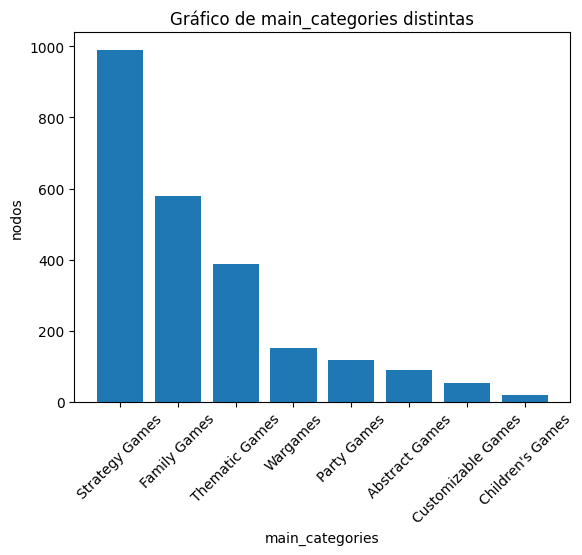

Cantidad de categories distintas: 84


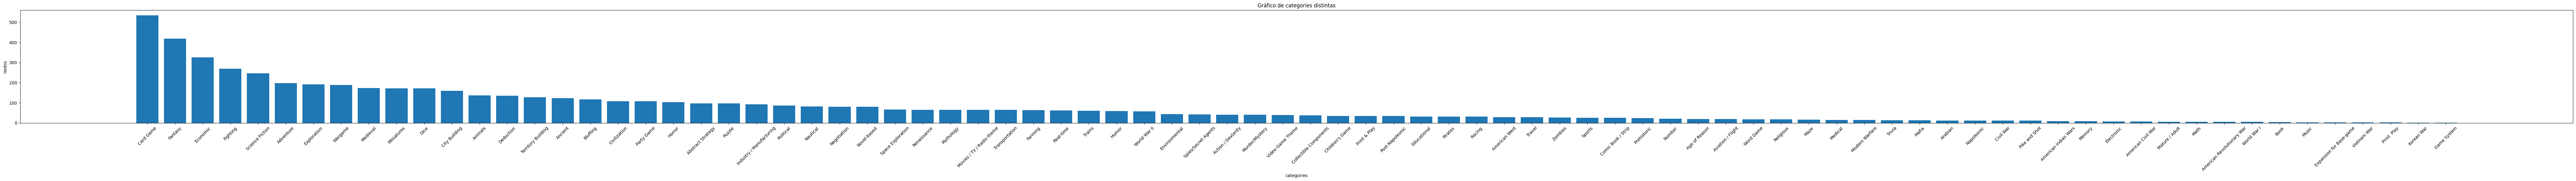

Cantidad de mechanics distintas: 186


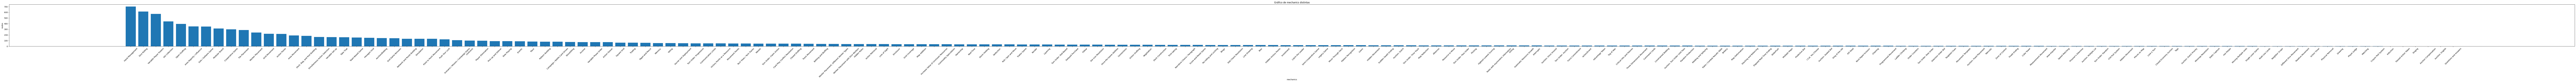

Cantidad de year distintas: 68


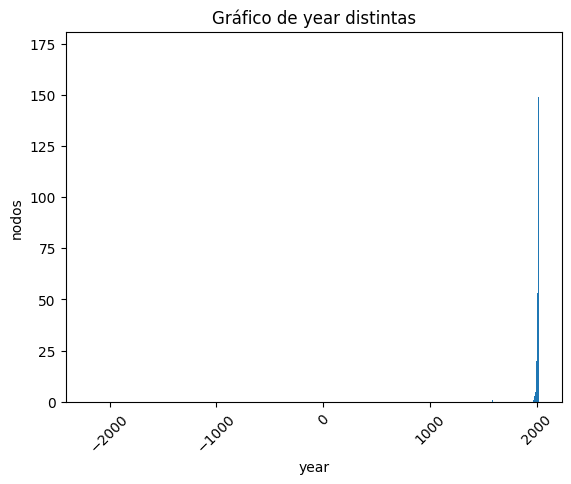

Cantidad de minplayers distintas: 7


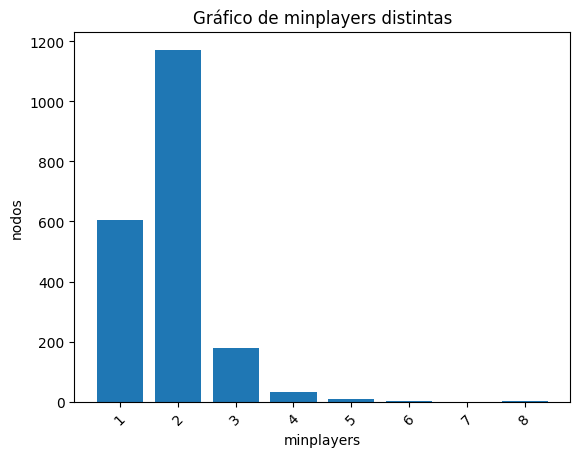

Cantidad de maxplayers distintas: 21


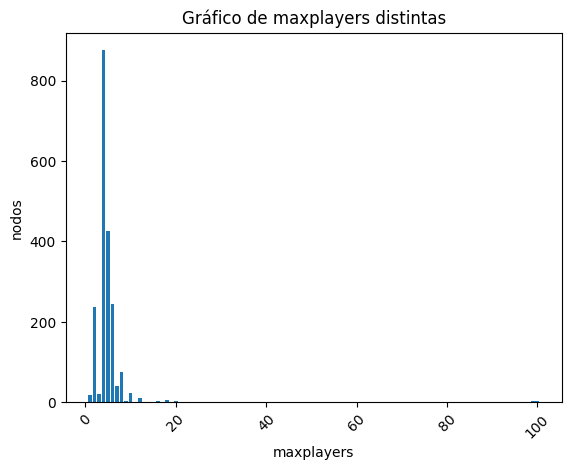

Cantidad de minplaytime distintas: 36


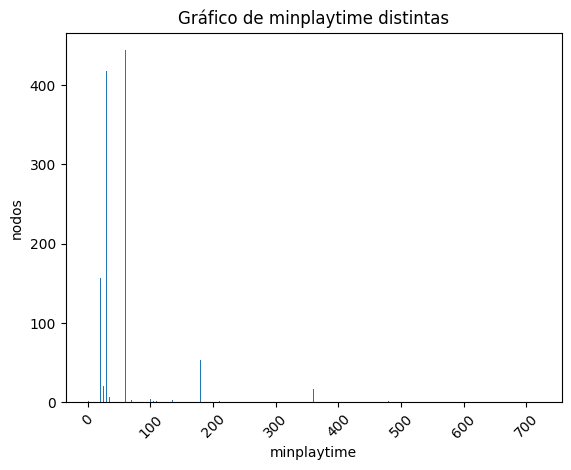

Cantidad de maxplaytime distintas: 47


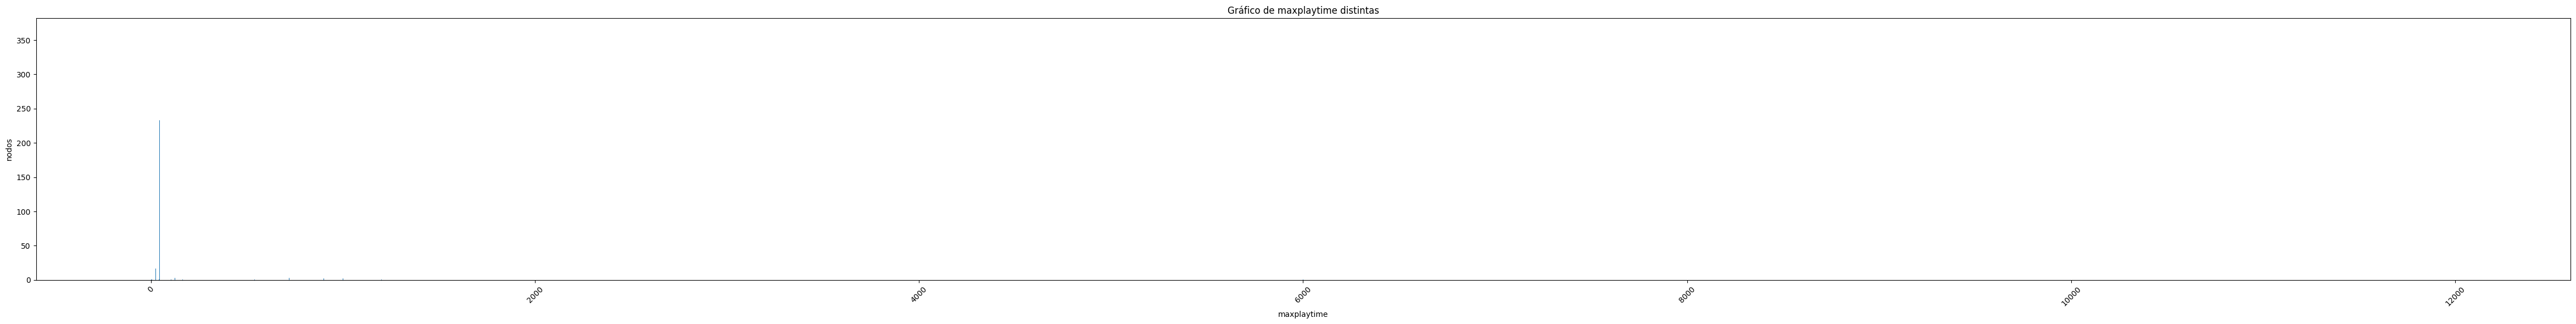

Cantidad de age distintas: 15


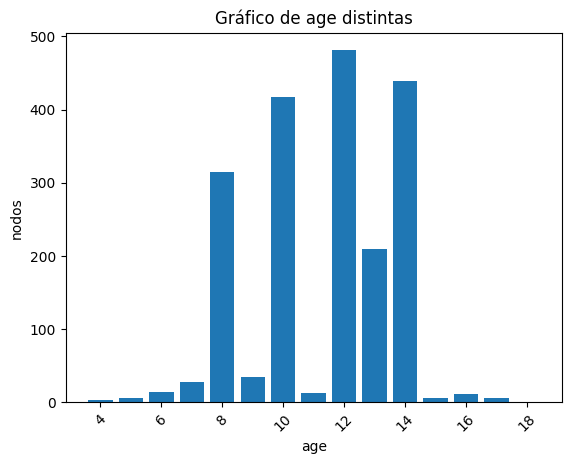

Cantidad de publisher distintas: 496


/tmp/ipykernel_3331/1479448764.py:42: UserWarning: Glyph 12508 (\N{KATAKANA LETTER BO}) missing from current font.
  plt.tight_layout()  # Ajustar automáticamente el diseño para evitar la superposición de elementos
/tmp/ipykernel_3331/1479448764.py:42: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from current font.
  plt.tight_layout()  # Ajustar automáticamente el diseño para evitar la superposición de elementos
/tmp/ipykernel_3331/1479448764.py:42: UserWarning: Glyph 12466 (\N{KATAKANA LETTER GE}) missing from current font.
  plt.tight_layout()  # Ajustar automáticamente el diseño para evitar la superposición de elementos
/tmp/ipykernel_3331/1479448764.py:42: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  plt.tight_layout()  # Ajustar automáticamente el diseño para evitar la superposición de elementos
/tmp/ipykernel_3331/1479448764.py:42: UserWarning: Glyph 12512 (\N{KATAKANA LETTER MU}) missing from current font.
  plt.tight_layout()  # Aj

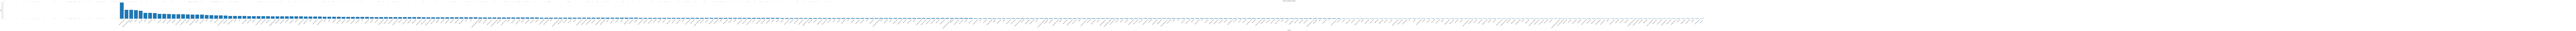

La cantidad de juegos de corta duracion es:  416
La cantidad de juegos cooperativos es: 300
La cantidad de juegos en solitario es: 350


In [144]:
main_categories  = filter_field_list('main_categories', 'main_categories')
categories = filter_field_list('categories', 'categories', adjust_graph=True)
mechanics = filter_field_list('mechanics', 'mechanics', adjust_graph=True)
years = filter_field('year', 'year')
minPlayers = filter_field('minplayers', 'minPlayers')
maxPlayers = filter_field('maxplayers', 'maxPlayers')
minPlaytime = filter_field('minplaytime', 'minPlaytime')
maxPlaytime = filter_field('maxplaytime', 'maxPlaytime', adjust_graph=True)
ages = filter_field('age', 'age')
publisher = filter_field('publisher', 'publisher', adjust_graph=True)

print(f'La cantidad de juegos de corta duracion es:  {len([x for x in gamesInfo.values() if x.is_short_game()])}')
print(f'La cantidad de juegos cooperativos es: {len([x for x in gamesInfo.values() if x.is_coop_game()])}')
print(f'La cantidad de juegos en solitario es: {len([x for x in gamesInfo.values() if x.is_solo_game()])}')

In [145]:
print(f'La cantidad de juegos son: {len(df_games)}')

filtered_games = []

for id, row in gamesInfo.items():
    if row.get_year() < 1900 or row.get_mechanics() == None or row.get_categories() == None or row.get_main_categories() == None:
        filtered_games.append(id)

len(filtered_games)

La cantidad de juegos son: 1999


47

In [146]:
df_games.head(5)

boardgame_id                                 title  year_published  \
0         77423  The Lord of the Rings: The Card Game            2011   
1            88                                Torres            1999   
2        203420  Exit: The Game – The Abandoned Cabin            2016   
3        310448                Zombie Teenz Evolution            2020   
4         25417                            BattleLore            2006   

   minplayers  maxplayers  minplaytime  maxplaytime  age  \
0           1           2           30           60   13   
1           2           4           60           60   12   
2           1           6           60          120   12   
3           2           4           15           25    8   
4           2           2           60           60   10   

         main_publisher                                          mechanics  \
0  Fantasy Flight Games  Cooperative Game|Deck Construction|Events|Hand...   
1           F.X. Schmid  Action Points|Area Majority / Influence|Enclos...   
2                KOSMOS                                   Cooperative Game   
3    Le Scorpion Masqué  Action Points|Cooperative Game|Dice Rolling|Ev...   
4        Days of Wonder  Area Majority / Influence|Campaign / Battle Ca...   

                                            category  \
0  Adventure|Card Game|Collectible Components|Fan...   
1                         Abstract Strategy|Medieval   
2                         Deduction|Puzzle|Real-time   
3                            Children's Game|Zombies   
4                Fantasy|Medieval|Miniatures|Wargame   

                      subdomains  \
0             Customizable Games   
1  Abstract Games|Strategy Games   
2    Family Games|Thematic Games   
3                   Family Games   
4        Thematic Games|Wargames   

                                     implementations  
0  The Lord of the Rings: The Card Game – Revised...  
1                           Torres Family|Burgenland  
2                                               None  
3                              Zombie Kidz Evolution  
4     BattleLore: Second Edition|Battles of Westeros

## Hacemos cosas con el grafo


In [147]:
import pandas as pd

# Read the .feather file
ratings_file = './bgg_ratings_top_2000.feather'
df_ratings = pd.read_feather(ratings_file)

# Drop the column you want to remove
df_ratings.drop(columns=['comment', 'last_modified', 'prevowned','fortrade','want','wanttoplay','wanttobuy','wishlist','preordered'], inplace=True)

print(f'Termino la carga del archivo y tiene {len(df_ratings)} filas')

Termino la carga del archivo y tiene 1003471 filas


In [148]:
df_ratings.head(5)

nickname             title  boardgame_id  rating  num_of_plays  own
0  happyjosiah  5-Minute Dungeon        207830     7.0             2    0
1  happyjosiah          6 nimmt!           432     7.0             8    0
2  happyjosiah         7 Wonders         68448     8.0            41    1
3  happyjosiah    7 Wonders Duel        173346     5.0             1    0
4  happyjosiah           Acquire             5     9.0            11    1

In [149]:
dicc_ratings = {}
dicc_num_plays = {}

for _, row in df_ratings.iterrows():
    rating = row['rating']
    own = row['own']
    numPlays = row['num_of_plays']

    if rating not in dicc_ratings:
        dicc_ratings[rating] = 0
    dicc_ratings[rating] += 1

    if numPlays not in dicc_num_plays:
        dicc_num_plays[numPlays] = 0
    dicc_num_plays[numPlays] += 1


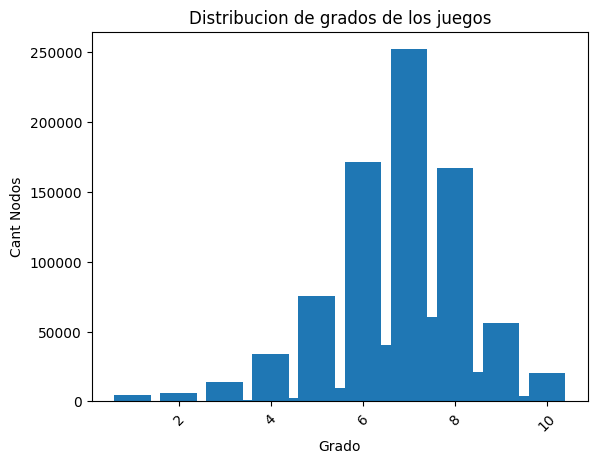

In [150]:
make_degree_graph(list(dicc_ratings.keys()), list(dicc_ratings.values())) 

In [104]:
""" sorted(list(dicc_num_plays.items()), key=lambda x: x[1], reverse=True) """

[(0, 334319),
 (1, 262955),
 (2, 111911),
 (3, 65015),
 (4, 42206),
 (5, 31038),
 (6, 22957),
 (7, 17532),
 (8, 13968),
 (9, 10894),
 (10, 10491),
 (11, 8142),
 (12, 7120),
 (13, 5750),
 (14, 5116),
 (15, 4627),
 (16, 3965),
 (17, 3456),
 (18, 3133),
 (19, 2663),
 (20, 2525),
 (21, 2159),
 (22, 1899),
 (24, 1704),
 (23, 1658),
 (25, 1558),
 (26, 1354),
 (27, 1161),
 (28, 1084),
 (30, 1033),
 (29, 1005),
 (31, 868),
 (32, 843),
 (33, 747),
 (34, 715),
 (35, 670),
 (36, 646),
 (37, 600),
 (38, 567),
 (39, 531),
 (40, 508),
 (41, 445),
 (42, 395),
 (44, 388),
 (50, 382),
 (43, 379),
 (45, 367),
 (46, 352),
 (48, 321),
 (49, 312),
 (47, 311),
 (51, 290),
 (53, 236),
 (52, 230),
 (54, 226),
 (55, 216),
 (57, 207),
 (56, 202),
 (60, 197),
 (59, 174),
 (61, 171),
 (64, 166),
 (62, 165),
 (58, 163),
 (63, 149),
 (66, 145),
 (65, 143),
 (67, 125),
 (68, 118),
 (69, 112),
 (70, 110),
 (72, 107),
 (71, 104),
 (73, 102),
 (82, 94),
 (76, 93),
 (75, 90),
 (78, 89),
 (80, 87),
 (100, 84),
 (74, 81),

In [151]:
# Group boardgames_ids by nicknames
nickNames = {}
i = 0
titles = {}
for _, row in df_ratings.iterrows():
    nickName = row['nickname']
    boardgameId = row['boardgame_id']
    title = row['title']
    rating = row['rating']
    own = row['own']
    numPlays = row['num_of_plays']

    if (rating > 9.0 and numPlays >= 20 and boardgameId not in filtered_games):
        i += 1
        if boardgameId not in titles:
            titles[boardgameId] = title
        if nickName not in nickNames:
            nickNames[nickName] = set()
        nickNames[nickName].add((boardgameId))

print(f'La cantidad de filas es: {i}')
print(f'Los titulos distintos son: {len(titles)}')

La cantidad de filas es: 5169
Los titulos distintos son: 842


In [152]:
boardgamesData = {}
j = 0
for nickName, boardgames in nickNames.items():
    if len(boardgames) < 2:
        j += 1
        continue
    for boardgame in boardgames:
        otherBoardGames  = [otherBoardGame for otherBoardGame in boardgames if otherBoardGame != boardgame]
        if boardgame not in boardgamesData:
            boardgamesData[boardgame] = otherBoardGames
        else: 
            for otherBoardGame in otherBoardGames: 
                if otherBoardGame not in boardgamesData[boardgame]:
                    boardgamesData[boardgame] += [otherBoardGame]
print(f'Cantidad de juegos distintos: {len(boardgamesData.keys())}')
print(f'La cantidad de jugadores que les gusto solo un 1 juego son: {j}')

Cantidad de juegos distintos: 834
La cantidad de jugadores que les gusto solo un 1 juego son: 211


In [153]:
import networkx as nx
rows = []
boardgame_already_use = {}
nx_graph = nx.Graph()

for boardgame, relatedBoardGames in boardgamesData.items():
    boardgame_already_use[boardgame] = True
    nx_graph.add_node(boardgame, name=titles[boardgame])
    for relatedBoardGame in relatedBoardGames:
        if relatedBoardGame in boardgame_already_use and boardgame in boardgamesData[relatedBoardGame]:
            continue
        else:
            rows.append((titles[boardgame], titles[relatedBoardGame]))
            nx_graph.add_edge(boardgame, relatedBoardGame)

In [154]:
print(f'La cantidad de aristas es: {len(nx_graph.edges())}')

La cantidad de aristas es: 17135


In [155]:
import csv

# Escribir las filas en un archivo CSV
with open('boardgame_otherboardgame2.csv', 'w', newline='') as archivo_csv:
    escritor_csv = csv.writer(archivo_csv)
    escritor_csv.writerow(['Source', 'Target'])  # Escribir encabezados
    escritor_csv.writerows(rows)  # Escribir las filas

# Calculos con NetworkX

Average degree: 42


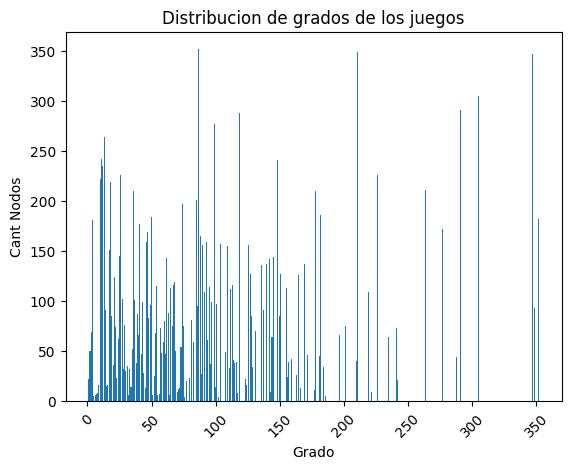

In [156]:
import math


degrees = dict(nx_graph.degree())
#Obtenemos el grado promedio
average_degree = sum(degrees.values()) / len(nx_graph)
print(f'Average degree: {math.ceil(average_degree)}')
 
diff_degrees = {}
for id, degree in degrees.items(): 
    if degree not in diff_degrees:
        diff_degrees[degree] = 0
    diff_degrees[degree] += 1
make_degree_graph(list(diff_degrees.keys()), list(degrees.values())) 

In [157]:
[(gamesInfo[x[0]].get_title(), x[0], x[1]) for x in sorted(list(degrees.items()), key=lambda x: x[1], reverse=True)[:10]]

[('Terraforming Mars', 167791, 352),
 ('Race for the Galaxy', 28143, 349),
 ('Dominion', 36218, 347),
 ('Gloomhaven', 174430, 305),
 ('Agricola', 31260, 291),
 ('Codenames', 178900, 288),
 ('The Castles of Burgundy', 84876, 277),
 ('7 Wonders', 68448, 264),
 ('Power Grid', 2651, 242),
 ('Puerto Rico', 3076, 241)]

In [158]:
gamesInfo[167791]

BoardGameRow(id=167791, title=Terraforming Mars, year=2016, minPlayers=1, maxPlayers=5, minPlaytime=120, maxPlaytime=120, publisher=FryxGames, age=12, mechanics=['Closed Drafting', 'Contracts', 'Enclosure', 'End Game Bonuses', 'Hand Management', 'Hexagon Grid', 'Income', 'Set Collection', 'Solo / Solitaire Game', 'Tags', 'Take That', 'Tech Trees / Tech Tracks', 'Tile Placement', 'Turn Order: Progressive', 'Variable Player Powers', 'Variable Set-up', 'Victory Points as a Resource'], coopGame=False, soloGame=True, shortGame=False, categories=['Economic', 'Environmental', 'Industry / Manufacturing', 'Science Fiction', 'Space Exploration', 'Territory Building'], main_categories=['Strategy Games'])

In [159]:
clustering_coefficient = nx.average_clustering(nx_graph)
print(f'Clustering coefficient: {round(clustering_coefficient, 2)}')

Clustering coefficient: 0.71


In [160]:
from collections import deque

def graph_diameter(graph):
    max_diameter = 0
    for node in graph:
        distances = bfs(graph, node)
        max_distance = max(distances.values())
        max_diameter = max(max_diameter, max_distance)
    return max_diameter


def bfs(graph, start):
    visited = set()
    queue = deque([(start, 0)])
    distances = {start: 0}

    while queue:
        node, dist = queue.popleft()

        if node not in visited:
            visited.add(node)
            for neighbor in graph.get(node, []):
                if neighbor not in distances:
                    distances[neighbor] = dist + 1
                    queue.append((neighbor, dist + 1))

    return distances

print(f'Network diameter: {graph_diameter(boardgamesData)}')

Network diameter: 5


In [161]:
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.pyplot as plt

# Detectar comunidades utilizando el algoritmo de modularity
communities = list(greedy_modularity_communities(nx_graph))


length_communities = len(communities)
print(f'La cantidad de comunidades es: {length_communities}')
for i in range(length_communities):
    print(f'La cantidad de nodos en la comunidad {i + 1} es: {len(communities[i])}')

La cantidad de comunidades es: 10
La cantidad de nodos en la comunidad 1 es: 397
La cantidad de nodos en la comunidad 2 es: 250
La cantidad de nodos en la comunidad 3 es: 78
La cantidad de nodos en la comunidad 4 es: 71
La cantidad de nodos en la comunidad 5 es: 8
La cantidad de nodos en la comunidad 6 es: 7
La cantidad de nodos en la comunidad 7 es: 7
La cantidad de nodos en la comunidad 8 es: 6
La cantidad de nodos en la comunidad 9 es: 5
La cantidad de nodos en la comunidad 10 es: 5


In [176]:
subgraph = nx.Graph()
community_nodes = list(communities[3])
subgraph.add_nodes_from([(node, {"name": titles[node]}) for node in community_nodes])

for node1 in community_nodes:
    for node2 in community_nodes:
        if node1 != node2 and nx_graph.has_edge(node1, node2):
            subgraph.add_edge(node1, node2)


In [177]:
community_nodes
for node in community_nodes:
    print(f'{gamesInfo[node]}')

BoardGameRow(id=9216, title=Goa, year=2004, minPlayers=2, maxPlayers=4, minPlaytime=90, maxPlaytime=90, publisher=Hans im Glück, age=12, mechanics=['Auction/Bidding', 'Auction: Once Around', 'Hand Management', 'Push Your Luck', 'Tech Trees / Tech Tracks'], coopGame=False, soloGame=False, shortGame=False, categories=['Economic', 'Farming', 'Nautical', 'Renaissance'], main_categories=['Strategy Games'])
BoardGameRow(id=43528, title=World Without End, year=2009, minPlayers=2, maxPlayers=4, minPlaytime=90, maxPlaytime=120, publisher=KOSMOS, age=12, mechanics=['Hand Management', 'Random Production'], coopGame=False, soloGame=False, shortGame=False, categories=['Economic', 'Medieval', 'Novel-based', 'Religious'], main_categories=['Strategy Games'])
BoardGameRow(id=16395, title=Blokus Duo, year=2005, minPlayers=2, maxPlayers=2, minPlaytime=15, maxPlaytime=15, publisher=(Unknown), age=5, mechanics=['Enclosure', 'Grid Coverage', 'Square Grid', 'Tile Placement'], coopGame=False, soloGame=False, 

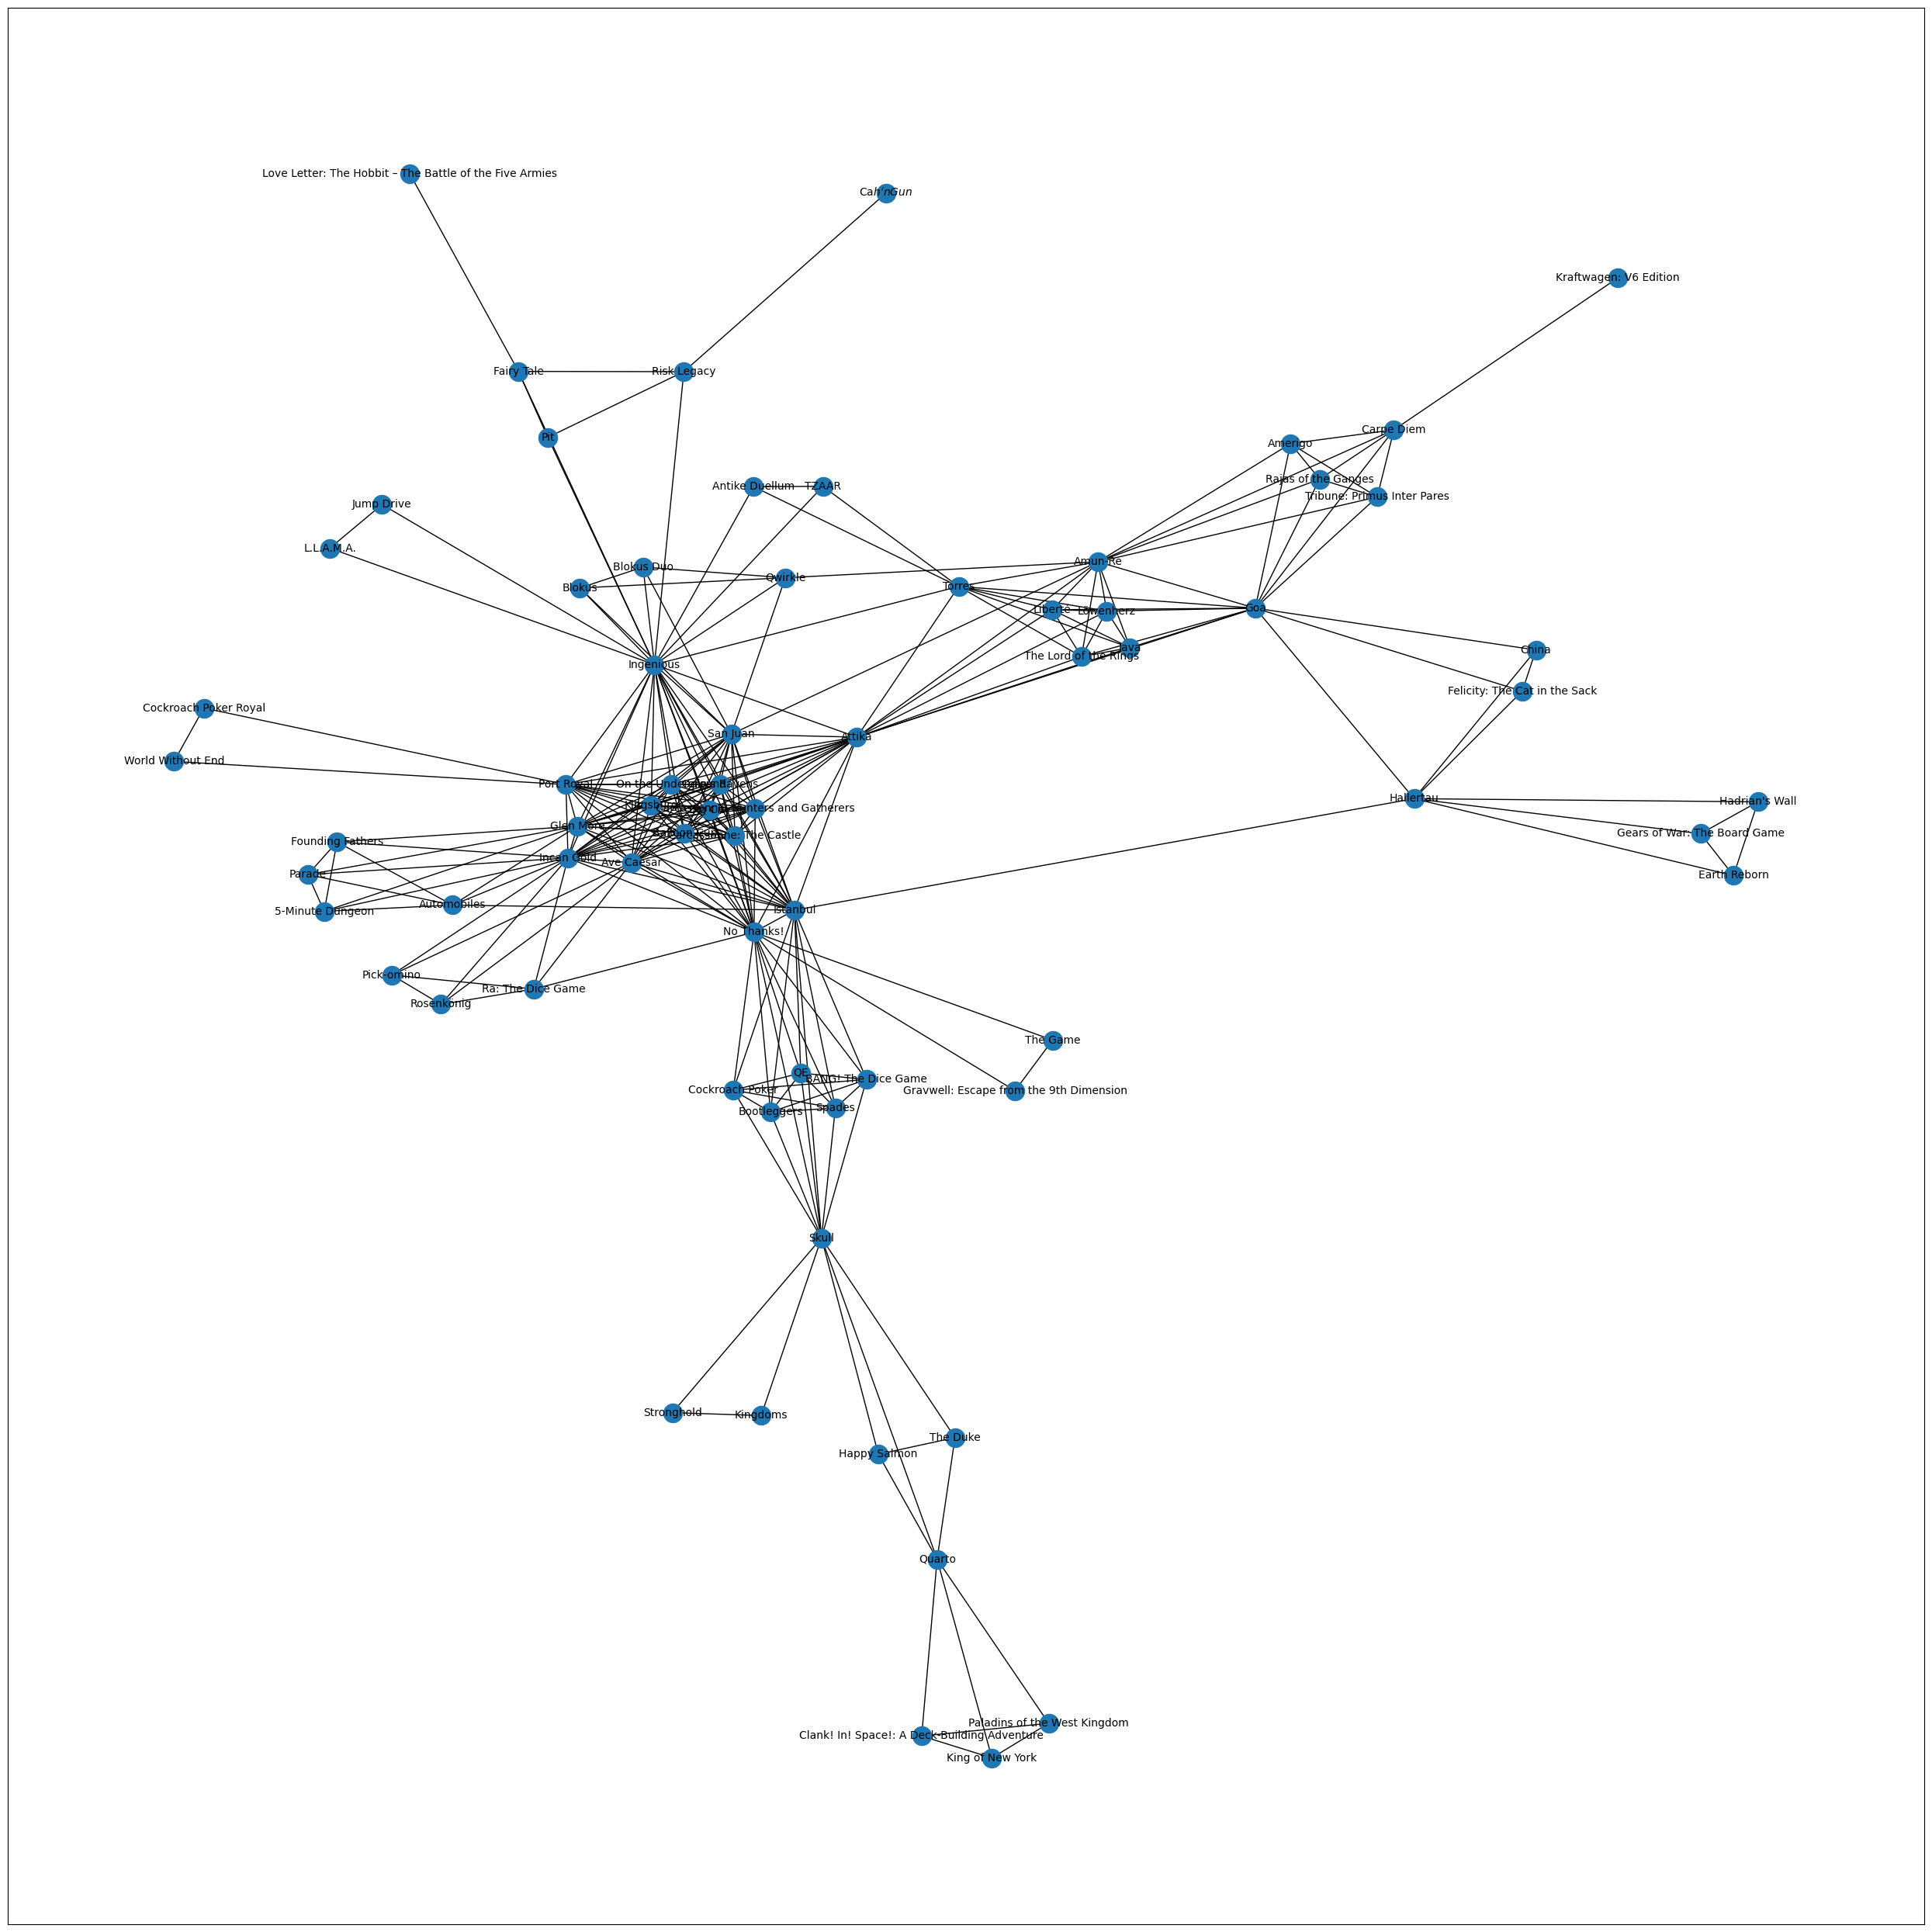

In [182]:
labels = dict([(node, titles[node]) for node in list(subgraph.nodes)])
plt.figure(figsize=(25, 25))
pos = nx.spring_layout(subgraph)
nx.draw_networkx(subgraph, pos, labels=labels,  with_labels=True, font_size=10)


# Mostrar el gráfico
plt.tight_layout()  # Ajustar automáticamente el diseño para evitar la superposición de elementos


plt.show()

In [183]:
from graphrole import RecursiveFeatureExtractor, RoleExtractor

def extract_roles_and_plot(G, title='',save = False ,file_name='', big=False):
    feature_extractor = RecursiveFeatureExtractor(G)
    features = feature_extractor.extract_features()
    role_extractor = RoleExtractor(n_roles=None)
    role_extractor.extract_role_factors(features)
    labels = {node: node for node in G.nodes()}

    available_colors = {'role_0':'#E9D758', 'role_1':'#297373', 'role_2':'#ff8552', 'role_3':'#888888', 'role_4':'#00aa00','role_5':'#aaaa00','role_6':'#aa0000' , 'role_7':'#0000aa'}
    
    colors = [available_colors[role_extractor.roles[node]] for node in G.nodes()]
    
    pos = nx.kamada_kawai_layout(G)
    if big:
        plt.figure(figsize=(15,15))
    else:
        plt.figure(figsize=(10,10))
    plt.title(title)

    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=colors, alpha=0.7, node_size=700, linewidths=2)
    nx.draw_networkx_edges(G, pos, width=0.3, alpha=0.5)
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    if save:
        plt.savefig(file_name, format = 'svg', dpi=300)

In [184]:
extract_roles_and_plot(subgraph, title='Roles red de vuelos', save=False, file_name='img/roles_punto6.svg')

ModuleNotFoundError: No module named 'pandas.core.methods.to_dict'

In [128]:
import networkx as nx
# Encontrar los puentes en el grafo
bridges = list(nx.bridges(nx_graph))

print("Puentes en la red:")
for bridge in bridges:
    graph_copy = nx_graph.copy()
    graph_copy.remove_edge(*bridge)
    
    # Verificar si la eliminación de la arista dividió la red en componentes disjuntas
    components = list(nx.connected_components(graph_copy))
    if len(components) == 1:
        print(f"Puente global: {titles[bridge[0]], titles[bridge[1]]}")
    else:
        print(f"Puente local: {titles[bridge[0]], titles[bridge[1]]}")

Puentes en la red:
Puente local: ('Dominion', 'Champions of Midgard')
Puente local: ('Gloomhaven', "The King's Dilemma")
Puente local: ('Terraforming Mars', 'Ascension: Des Âmes Déchaînées')
Puente local: ('Tichu', 'Krosmaster: Arena')
Puente local: ('Carcassonne', 'Sword & Sorcery')
Puente local: ('Modern Art', 'The Bottle Imp')
Puente local: ('Lords of Waterdeep', 'Jamaica')
Puente local: ('Similo: History', 'Spicy')
Puente local: ('Skull King', 'Arcadia Quest')
Puente local: ('Twilight Imperium: Fourth Edition', 'Wildlands')
Puente local: ('Up Front', 'Empires in Arms')
Puente local: ('Up Front', 'Automobile')


In [24]:
# Step 1: Read CSV file into DataFrame
csv_file = './boardgamesCommunities.csv'
df_communities = pd.read_csv(csv_file)

gamesInfo = {}

df_result = pd.merge(df_communities, df_games, on='title')

for _, row in df_result.iterrows():
    gamesInfo[row['boardgame_id']] = BoardGameRow(row)

    

gamesInfo.items()
print(len(df_games))
print(len(df_result))
print(len(df_communities))



    

#Cantidad de nodos  -- 1146 
#Cantidad de aristas -- 40715
#Diametro -- 4
#Grado promedio -- 71
#Coeficiente de clustering  -- 0.724
#Puentes globales y locales
#Analisis de centralidad
#Comunidades  --  4
#Homofilia
#Roles
#Motifs






1999
1103
1146
